<a href="https://colab.research.google.com/github/edsonportosilva/OptiCommPy/blob/main/examples/test_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if 'google.colab' in str(get_ipython()):
    ! git clone -b main https://github.com/edsonportosilva/OptiCommPy
    from os import chdir as cd
    cd('/content/OptiCommPy/')
    ! pip install .

In [ ]:
from optic.comm.modulation import modulateGray, grayMapping
from optic.comm.metrics import monteCarloGMI, monteCarloMI, fastBERcalc, theoryBER, theoryMI, calcEVM
from optic.models.channels import awgn
from optic.dsp.core import pnorm
from optic.plot import pconst
from optic.utils import parameters, dB2lin
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [3]:
%load_ext autoreload
%autoreload 2
#%load_ext line_profiler

## Test bit-error-rate (BER) versus signal-to-noise ratio per bit ($E_b/N_0$)

### QAM constellations with Gray mapping

In [4]:
# Run BER vs Ebn0 Monte Carlo simulation in the AWGN channel

qamOrder  = [4, 16, 64, 256, 1024, 4096]  # Modulation order

EbN0dB_  = np.arange(-2, 35, 1)
BER      = np.zeros((len(EbN0dB_),len(qamOrder)))
BER[:]   = np.nan

for ii, M in enumerate(qamOrder):
    print('run sim: M = ', M)
    for indSNR in tqdm(range(EbN0dB_.size)):

        EbN0dB = EbN0dB_[indSNR]

        # generate random bits
        bitsTx = np.random.randint(2, size=int(np.log2(M)*1e5))

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'qam')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx)

        # AWGN channel
        snrdB  = EbN0dB + 10*np.log10(np.log2(M))
        symbRx = awgn(symbTx, snrdB)

        # BER calculation
        BER[indSNR, ii] = fastBERcalc(symbRx, symbTx, M, 'qam')[0][0]

        if BER[indSNR, ii] == 0:
            break

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  256


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  1024


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  4096


  0%|          | 0/37 [00:00<?, ?it/s]

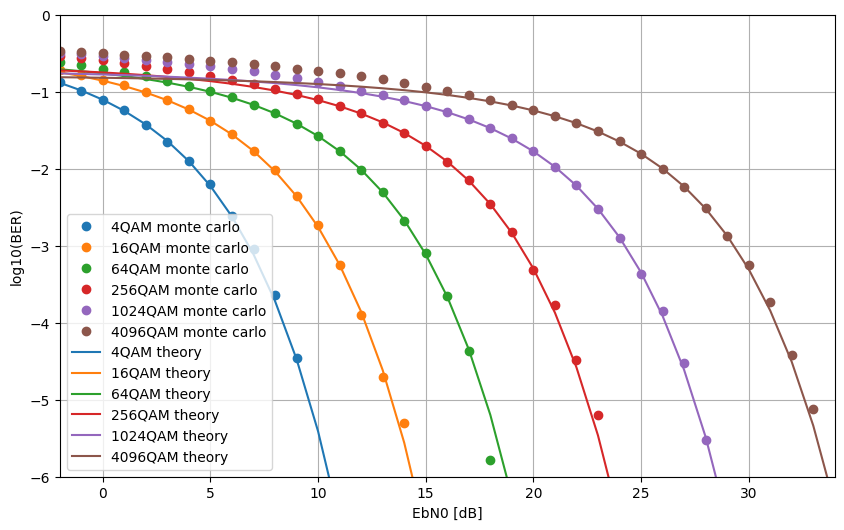

In [5]:
# Plot simulation results and theoretical curves
BER[BER==0] = np.nan

plt.figure(figsize=(10,6))
for ii, M in enumerate(qamOrder):
    plt.plot(EbN0dB_, np.log10(BER[:,ii]), 'o', label=f'{str(M)}QAM monte carlo')

plt.gca().set_prop_cycle(None)

for M in qamOrder:
    BERtheory = theoryBER(M, EbN0dB_,'qam')
    BERtheory[BERtheory==0] = np.nan
    plt.plot(EbN0dB_, np.log10(BERtheory), '-', label=f'{str(M)}QAM theory')

plt.xlim(min(EbN0dB_), max(EbN0dB_))
plt.ylim(-6, 0)
plt.legend();
plt.xlabel('EbN0 [dB]');
plt.ylabel('log10(BER)');
plt.grid()

### PSK constellations with Gray mapping

In [6]:
# Run BER vs Ebn0 Monte Carlo simulation

pskOrder  = [4, 8, 16, 32, 64]  # Modulation order

EbN0dB_  = np.arange(-2, 35, 1)
BER      = np.zeros((len(EbN0dB_),len(pskOrder)))
BER[:]   = np.nan

for ii, M in enumerate(pskOrder):
    print('run sim: M = ', M)
    for indSNR in tqdm(range(EbN0dB_.size)):

        EbN0dB = EbN0dB_[indSNR]

        # generate random bits
        bitsTx = np.random.randint(2, size=int(np.log2(M)*1e5))

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'psk')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx)

        # AWGN channel
        snrdB  = EbN0dB + 10*np.log10(np.log2(M))
        symbRx = awgn(symbTx, snrdB)

        # BER calculation
        BER[indSNR, ii] = fastBERcalc(symbRx, symbTx, M, 'psk')[0][0]

        if BER[indSNR, ii] == 0:
            break

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  8


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  32


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

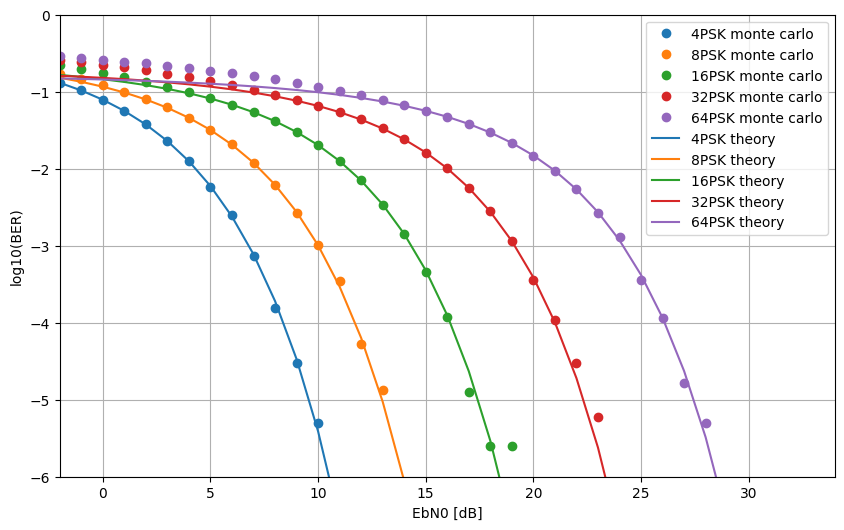

In [7]:
# Plot simulation results and theoretical curves
BER[BER==0] = np.nan

plt.figure(figsize=(10,6))
for ii, M in enumerate(pskOrder):
    plt.plot(EbN0dB_, np.log10(BER[:,ii]), 'o', label=f'{str(M)}PSK monte carlo')

plt.gca().set_prop_cycle(None)

for M in pskOrder:
    BERtheory = theoryBER(M, EbN0dB_,'psk')
    BERtheory[BERtheory==0] = np.nan
    plt.plot(EbN0dB_, np.log10(BERtheory), '-', label=f'{str(M)}PSK theory')

plt.xlim(min(EbN0dB_), max(EbN0dB_))
plt.ylim(-6, 0)
plt.legend();
plt.xlabel('EbN0 [dB]');
plt.ylabel('log10(BER)');
plt.grid()

### APSK constellations with Gray Mapping

In [8]:
# Run BER vs Ebn0 Monte Carlo simulation

apskOrder  = [16, 64, 256, 1024]  # Modulation order

EbN0dB_  = np.arange(-2, 35, 1)
BER      = np.zeros((len(EbN0dB_),len(apskOrder)))
BER[:]   = np.nan

for ii, M in enumerate(apskOrder):
    print('run sim: M = ', M)
    for indSNR in tqdm(range(EbN0dB_.size)):

        EbN0dB = EbN0dB_[indSNR]

        # generate random bits
        bitsTx = np.random.randint(2, size=int(np.log2(M)*1e5))

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'apsk')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx)

        # AWGN channel
        snrdB  = EbN0dB + 10*np.log10(np.log2(M))
        symbRx = awgn(symbTx, snrdB)

        # BER calculation
        BER[indSNR, ii] = fastBERcalc(symbRx, symbTx, M, 'apsk')[0][0]

        if BER[indSNR, ii] == 0:
            break

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  256


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  1024


  0%|          | 0/37 [00:00<?, ?it/s]

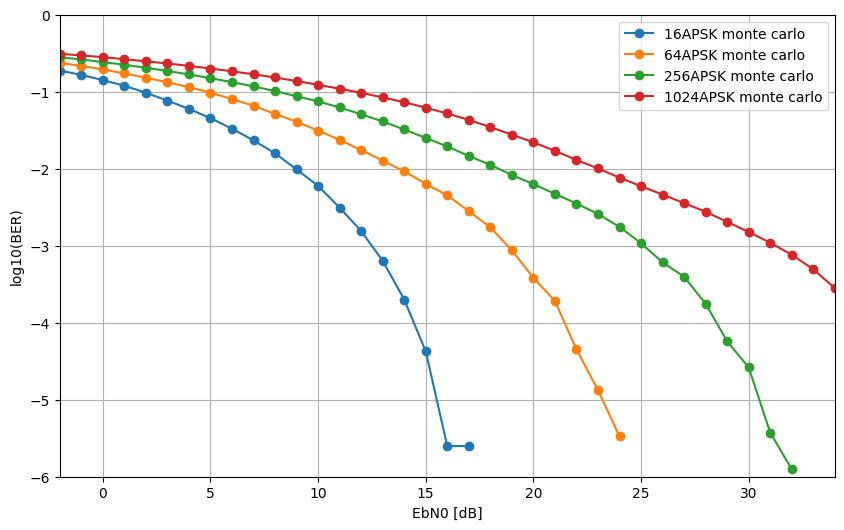

In [9]:
# Plot simulation results and theoretical curves
BER[BER==0] = np.nan

plt.figure(figsize=(10,6))
for ii, M in enumerate(apskOrder):
    plt.plot(EbN0dB_, np.log10(BER[:,ii]), '-o', label=f'{str(M)}APSK monte carlo')

# plt.gca().set_prop_cycle(None)

# for M in apskOrder:
#     BERtheory = theoryBER(M, EbN0dB_,'psk')
#     BERtheory[BERtheory==0] = np.nan
#     plt.plot(EbN0dB_, np.log10(BERtheory), '-', label=f'{str(M)}PSK theory')

plt.xlim(min(EbN0dB_), max(EbN0dB_))
plt.ylim(-6, 0)
plt.legend();
plt.xlabel('EbN0 [dB]');
plt.ylabel('log10(BER)');
plt.grid()

## Test mutual information (MI) versus signal-to-noise ratio (SNR)

### QAM constellations with Gray mapping

In [10]:
# Run MI vs SNR Monte Carlo simulation

qamOrder  = [4, 16, 64, 256]  # Modulation order

SNR  = np.arange(-2, 35, 1)
MI  = np.zeros((len(SNR),len(qamOrder)))
MItheory  = np.zeros((len(SNR),len(qamOrder)))

for ii, M in enumerate(qamOrder):
    print('run sim: M = ', M)

    for indSNR in tqdm(range(SNR.size)):

        snrdB = SNR[indSNR]

        # generate random bits
        bitsTx   = np.random.randint(2, size=int(np.log2(M)*1e4))

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'qam')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx)

        # AWGN channel
        symbRx = awgn(symbTx, snrdB)

        # MI estimation
        MI[indSNR, ii] = monteCarloMI(symbRx, symbTx, M, 'qam')[0]
        MItheory[indSNR, ii] = theoryMI(M, 'qam', snrdB)

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  256


  0%|          | 0/37 [00:00<?, ?it/s]

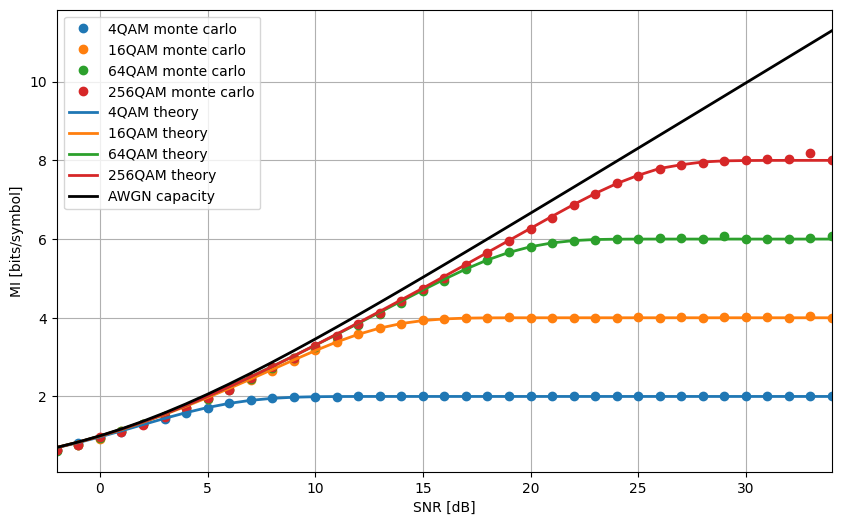

In [11]:
plt.figure(figsize=(10,6))

for ii, M in enumerate(qamOrder):
    plt.plot(SNR, MI[:,ii], 'o', label=f'{str(M)}QAM monte carlo', linewidth=2)

plt.gca().set_prop_cycle(None)

for ii, M in enumerate(qamOrder):
    plt.plot(SNR, MItheory[:,ii], '-', label=f'{str(M)}QAM theory', linewidth=2)

# plot theoretical AWGN channel capacity
C = np.log2(1 + dB2lin(SNR))
plt.plot(SNR, C,'k-', label='AWGN capacity',linewidth=2)


plt.xlim(min(SNR), max(SNR))
plt.legend();
plt.xlabel('SNR [dB]');
plt.ylabel('MI [bits/symbol]');
plt.grid()

## Test generalized mutual information (GMI) versus signal-to-noise ratio (SNR)

### QAM constellations with Gray mapping

In [12]:
# Run GMI vs SNR Monte Carlo simulation

qamOrder  = [4, 16, 64, 256, 1024, 4096]  # Modulation order

SNR  = np.arange(-2, 35, 1)
GMI  = np.zeros((len(SNR),len(qamOrder)))

for ii, M in enumerate(qamOrder):
    print('run sim: M = ', M)
    for indSNR in tqdm(range(SNR.size)):

        snrdB = SNR[indSNR]

        # generate random bits
        bitsTx   = np.random.randint(2, size=int(np.log2(M)*1e5))

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'qam')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx)

        # AWGN channel
        symbRx = awgn(symbTx, snrdB)

        # GMI estimation
        GMI[indSNR, ii] = monteCarloGMI(symbRx, symbTx, M, 'qam')[0][0]

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  256


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  1024


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  4096


  0%|          | 0/37 [00:00<?, ?it/s]

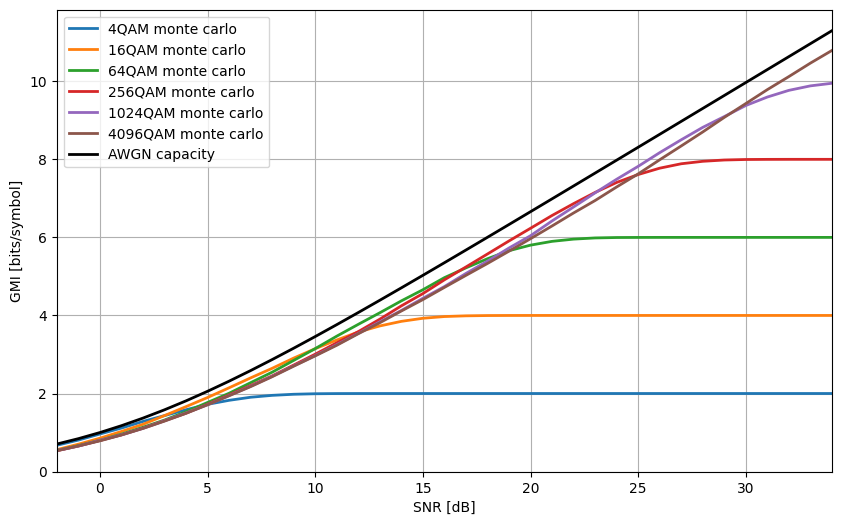

In [13]:
plt.figure(figsize=(10,6))
for ii, M in enumerate(qamOrder):
    plt.plot(SNR, GMI[:,ii], '-', label=f'{str(M)}QAM monte carlo', linewidth=2)

# plot theoretical AWGN channel capacity
C = np.log2(1 + 10**(SNR/10))
plt.plot(SNR, C,'k-', label='AWGN capacity',linewidth=2)


plt.xlim(min(SNR), max(SNR))
plt.legend();
plt.xlabel('SNR [dB]');
plt.ylabel('GMI [bits/symbol]');
plt.grid()

### PSK constellations with Gray mapping

In [14]:
# Run GMI vs SNR Monte Carlo simulation

pskOrder  = [4, 8, 16, 32, 64]  # Modulation order

SNR  = np.arange(-2, 35, 1)
GMI  = np.zeros((len(SNR),len(pskOrder)))

for ii, M in enumerate(pskOrder):
    print('run sim: M = ', M)
    for indSNR in tqdm(range(SNR.size)):

        snrdB = SNR[indSNR]

        # generate random bits
        bitsTx   = np.random.randint(2, size=int(np.log2(M)*1e4))

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'psk')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx)

        # AWGN channel
        symbRx = awgn(symbTx, snrdB)

        # GMI estimation
        GMI[indSNR, ii]  = monteCarloGMI(symbRx, symbTx, M, 'psk')[0][0]

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  8


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  32


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

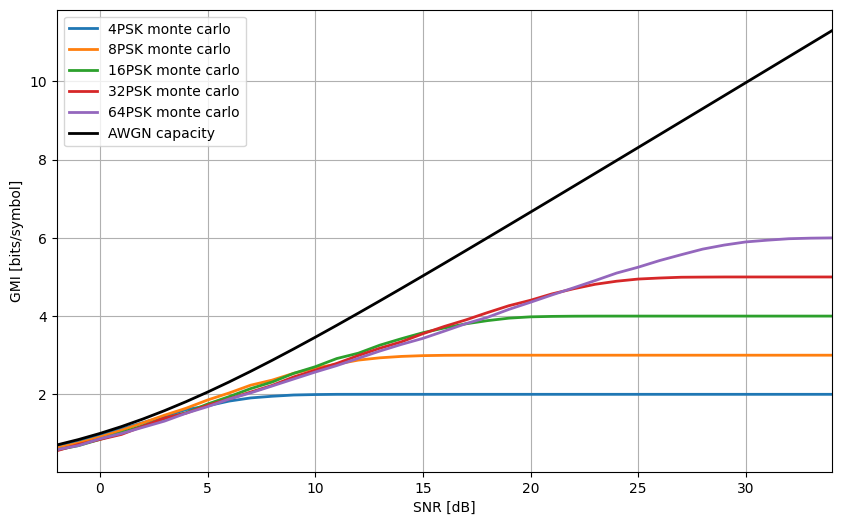

In [15]:
plt.figure(figsize=(10,6))
for ii, M in enumerate(pskOrder):
    plt.plot(SNR, GMI[:,ii], '-', label=f'{str(M)}PSK monte carlo', linewidth=2)

# plot theoretical AWGN channel capacity
C = np.log2(1 + 10**(SNR/10))
plt.plot(SNR, C,'k-', label='AWGN capacity',linewidth=2)


plt.xlim(min(SNR), max(SNR))
plt.legend();
plt.xlabel('SNR [dB]');
plt.ylabel('GMI [bits/symbol]');
plt.grid()

## Test MI/GMI versus signal-to-noise ratio (SNR) with probabilistically shaped QAM constellation

In [16]:
from numpy.random import choice

def maxwellBolt(λ, const):

    p = np.zeros(const.size)

    for ind, x in enumerate(const):
        p[ind] = np.exp(-λ*np.abs(x)**2)

    p = p/np.sum(p)

    return p

run sim: M =  256


  0%|          | 0/36 [00:00<?, ?it/s]

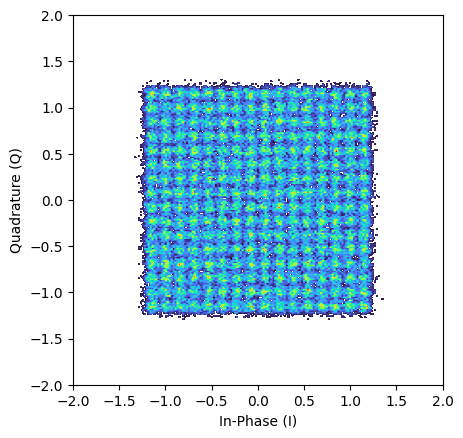

run sim: M =  256


  0%|          | 0/36 [00:00<?, ?it/s]

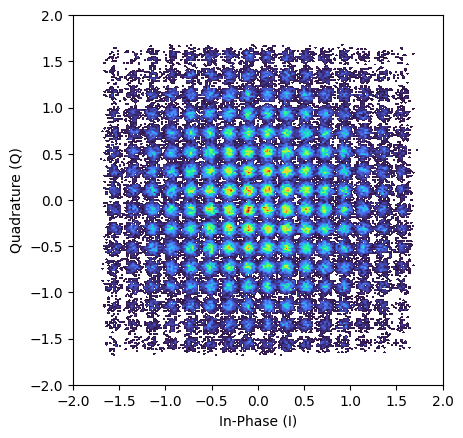

In [17]:
# Run MI vs SNR Monte Carlo simulation

qamOrder  = [256, 256]  # Modulation order

SNR  = np.arange(-2, 34, 1)
MI = np.zeros((len(SNR),len(qamOrder)))
GMI = np.zeros((len(SNR),len(qamOrder)))
Nsymbols = 80000

PS = 0
for ii, M in enumerate(qamOrder):
    print('run sim: M = ', M)

    constSymb = grayMapping(M, 'qam')
    Es = np.mean(np.abs(constSymb) ** 2)
    constSymb = constSymb / np.sqrt(Es)

    probSymb = maxwellBolt(PS, constSymb)
    PS = 1.5

    Es = np.sum(( np.abs(constSymb) ** 2 ) * probSymb)

    for indSNR in tqdm(range(SNR.size)):

        snrdB = SNR[indSNR]

        # generate random symbols
        symbTx = choice(constSymb, Nsymbols, p=probSymb)

        # AWGN channel
        symbRx = awgn(symbTx, snrdB)

        # MI estimation
        MI[indSNR, ii] = monteCarloMI(symbRx, symbTx, M, 'qam', probSymb)[0]
        GMI[indSNR, ii] = monteCarloGMI(symbRx, symbTx, M, 'qam', probSymb)[0][0]

        if indSNR == len(SNR)-10:
            pconst(symbRx, R=2);

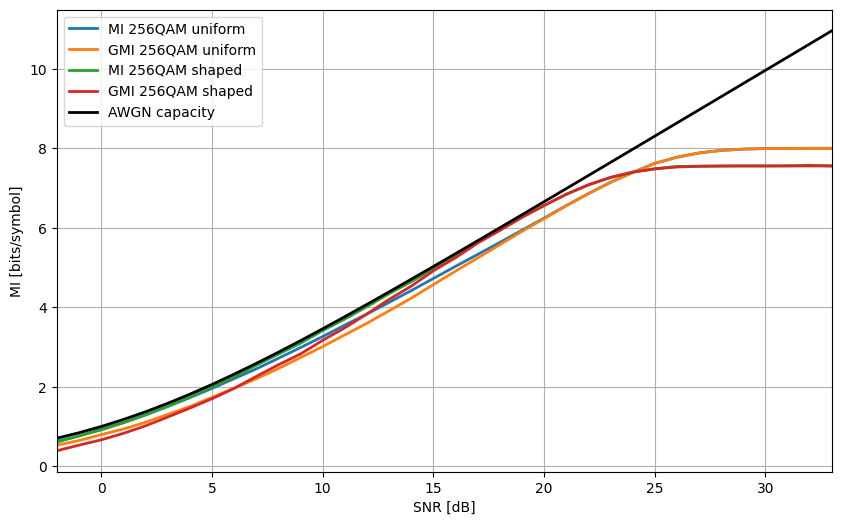

In [18]:
plt.figure(figsize=(10,6))

for ii, M in enumerate(qamOrder):
    pltLabel = 'QAM uniform' if ii == 0 else 'QAM shaped'
    plt.plot(SNR, MI[:,ii], '-', label=f'MI {str(M)}{pltLabel}', linewidth=2)
    plt.plot(SNR, GMI[:,ii], '-', label=f'GMI {str(M)}{pltLabel}', linewidth=2)

# plot theoretical AWGN channel capacity
C = np.log2(1 + 10**(SNR/10))
plt.plot(SNR, C,'k-', label='AWGN capacity',linewidth=2)


plt.xlim(min(SNR), max(SNR))
plt.legend();
plt.xlabel('SNR [dB]');
plt.ylabel('MI [bits/symbol]');
plt.grid()

## Test error vector magnitude (EVM) versus signal-to-noise ratio (SNR)

In [19]:
# Run EVM vs SNR Monte Carlo simulation

qamOrder  = [4, 16, 64, 256, 1024]  # Modulation order

SNR  = np.arange(-2, 35, 1)
EVM_dataAided  = np.zeros((len(SNR),len(qamOrder)))
EVM_decisions  = np.zeros((len(SNR),len(qamOrder)))

for ii, M in enumerate(qamOrder):
    print('run sim: M = ', M)

    for indSNR in tqdm(range(SNR.size)):

        snrdB = SNR[indSNR]

        # generate random bits
        bitsTx   = np.random.randint(2, size=int(np.log2(M)*1e5))

        # Map bits to constellation symbols
        symbTx = modulateGray(bitsTx, M, 'qam')

        # Normalize symbols energy to 1
        symbTx = pnorm(symbTx)

        # AWGN channel
        symbRx = awgn(symbTx, snrdB)

        # EVM estimation
        EVM_dataAided[indSNR, ii] = calcEVM(symbRx, M, 'qam', symbTx=symbTx)[0]
        EVM_decisions[indSNR, ii] = calcEVM(symbRx, M, 'qam')[0]

run sim: M =  4


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  16


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  64


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  256


  0%|          | 0/37 [00:00<?, ?it/s]

run sim: M =  1024


  0%|          | 0/37 [00:00<?, ?it/s]

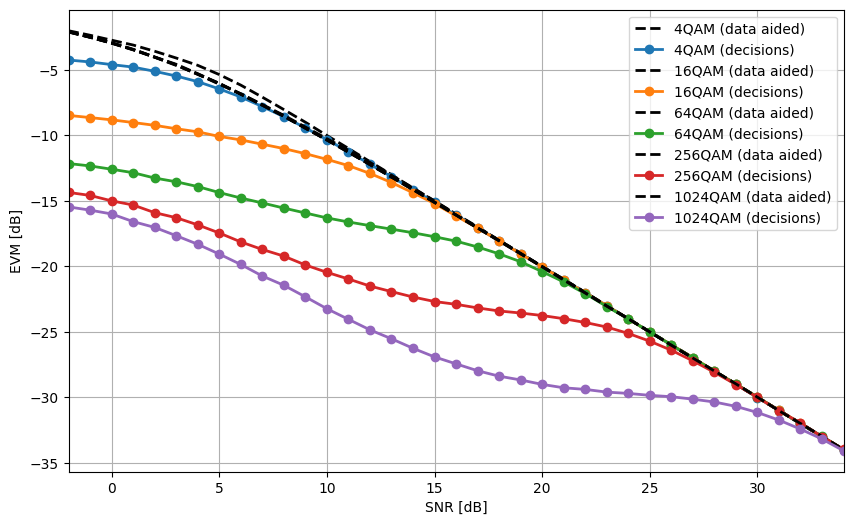

In [20]:
plt.figure(figsize=(10,6))

for ii, M in enumerate(qamOrder):
    plt.plot(SNR, 10*np.log10(EVM_dataAided[:,ii]), '--', color='black', label=f'{str(M)}QAM (data aided)', linewidth=2)
    plt.plot(SNR, 10*np.log10(EVM_decisions[:,ii]), '-o', label=f'{str(M)}QAM (decisions)', linewidth=2)


plt.xlim(min(SNR), max(SNR))
plt.legend();
plt.xlabel('SNR [dB]');
plt.ylabel('EVM [dB]');
plt.grid()

## Test OSNR/SNR prediction with the Gaussian Noise model (GN Model) as a function of the fiber input power

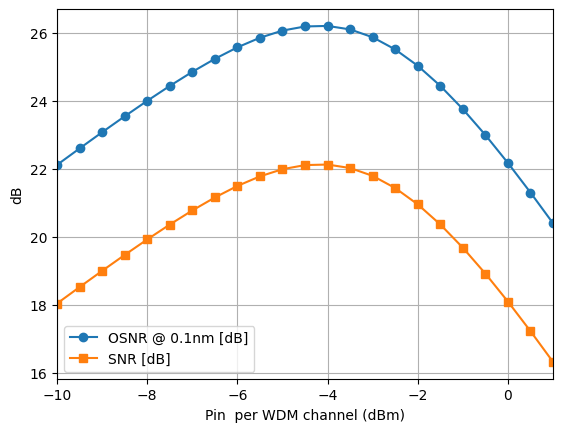

In [21]:
from optic.comm.metrics import GNmodel_OSNR

# optical signal parameters
Nch = 80   # Number of Nyquist-WDM channels
Rs = 32e9  # Symbol-rate
Δf = 37.5e9 # WDM grid spacing in Hz
Bref = 12.5e9 # reference bandwidth for OSNR measurement in Hz

# optical channel parameters
paramCh = parameters()
paramCh.Ltotal = 700   # total link distance [km]
paramCh.Lspan  = 50    # span length [km]
paramCh.alpha = 0.2    # fiber loss parameter [dB/km]
paramCh.D = 16         # fiber dispersion parameter [ps/nm/km]
paramCh.gamma = 1.3    # fiber nonlinear parameter [1/(W.km)]
paramCh.Fc = 193.1e12  # central optical frequency of the WDM spectrum in Hz

Ptx = np.arange(-10, 1.5, 0.5)

OSNR,_,_ = GNmodel_OSNR(Rs, Nch, Δf, Ptx, paramCh, Bref)

OSNR_dB = 10*np.log10(OSNR)
SNR_dB = OSNR_dB-10*np.log10(Rs/Bref);

plt.plot(Ptx, OSNR_dB,'-o',label='OSNR @ 0.1nm [dB]')
plt.plot(Ptx, SNR_dB,'-s',label='SNR [dB]')
plt.grid()
plt.ylabel('dB')
plt.xlabel('Pin  per WDM channel (dBm)')
plt.legend();
plt.xlim(min(Ptx), max(Ptx));

## Test OSNR/SNR prediction with for a linear fiber channel as a function of the distance

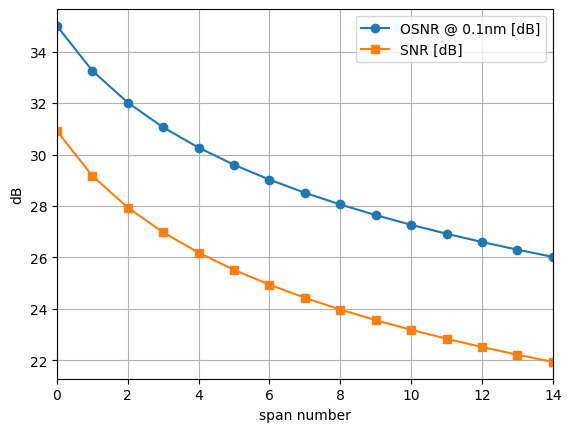

In [22]:
from optic.comm.metrics import calcLinOSNR

Ns = 14       # number of fiber spans
Ls = 50       # span length in km
Rs = 32e9     # symbol-rate
Pin = -4      # launch power per channel in dBm
OSNRin = 35   # launch OSNR in dB
NF = 6        # EDFA noise figure in dB
α = 0.2       # fiber attenuation in dB/km
Fc = 193.1e12 # central optical frequency in Hz
Bref = 12.5e9 # OSNR reference bandwidth in Hz

OSNR_dB = calcLinOSNR(Ns, Pin, α, Ls, OSNRin, NF, Fc, Bref)

SNR_dB = OSNR_dB-10*np.log10(Rs/Bref);

plt.plot(OSNR_dB,'-o',label='OSNR @ 0.1nm [dB]')
plt.plot(SNR_dB,'-s',label='SNR [dB]')
plt.grid()
plt.ylabel('dB')
plt.xlabel('span number')
plt.legend();
plt.xlim(0, Ns);